In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_21-25.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-03-21,1241378562659225600,Dear Friends!\nDON’T WORRY DO WORTHY EFFORTS A...,[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",dear friends ! worry worthy efforts corona vir...,1
1,2020-03-21,1241378567042125826,This is no way to deal with a pandemic situati...,[],273.0,{'country_code': 'in'},way deal pandemic situation delhi airport last...,-1
2,2020-03-21,1241381045708021761,All good decisions! Well done Delhi govt.. lag...,[],1650.0,{'country_code': 'in'},good decisions ! well done delhi govt lage rah...,1
3,2020-03-21,1241381045800484865,NDTV anchor Sonal Mehrotra self-quarantines af...,[],1421.0,"{'country_code': 'in', 'state': 'Maharashtra'}",ndtv anchor sonal mehrotra self quarantines si...,1
4,2020-03-21,1241381620436754432,China made temporary 1000 bed Hospital in 10 d...,['CoronaVirus'],1356.0,{'country_code': 'in'},china made temporary bed hospital days viral w...,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(332842, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-03-21,1241378562659225600,Dear Friends!\nDON’T WORRY DO WORTHY EFFORTS A...,[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",dear friends ! worry worthy efforts corona vir...,1
1,2020-03-21,1241378567042125826,This is no way to deal with a pandemic situati...,[],273.0,{'country_code': 'in'},way deal pandemic situation delhi airport last...,-1
2,2020-03-21,1241381045708021761,All good decisions! Well done Delhi govt.. lag...,[],1650.0,{'country_code': 'in'},good decisions ! well done delhi govt lage rah...,1
3,2020-03-21,1241381045800484865,NDTV anchor Sonal Mehrotra self-quarantines af...,[],1421.0,"{'country_code': 'in', 'state': 'Maharashtra'}",ndtv anchor sonal mehrotra self quarantines si...,1
4,2020-03-21,1241381620436754432,China made temporary 1000 bed Hospital in 10 d...,['CoronaVirus'],1356.0,{'country_code': 'in'},china made temporary bed hospital days viral w...,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
332837,2020-03-25,1242738029040513024,Spain to use artificial intelligence to automa...,"['Machinelearning', 'bigdata', 'datascience', ...",1.0,"{'country_code': 'in', 'state': 'Karnataka', ...",spain use artificial intelligence automate cor...,1
332838,2020-03-25,1242863321021157378,#COViD19: #Spain's death toll #overtakes #Chin...,"['COViD19', 'Spain', 'overtakes', 'China', 'Wo...",4.0,"{'country_code': 'in', 'state': 'Karnataka', ...",covid spain death toll overtakes china whole w...,-1
332839,2020-03-25,1242665341664149504,Trudeau leaves #door #open to using #smartphon...,"['door', 'open', 'smartphone', 'data', 'Canadi...",5.0,"{'country_code': 'in', 'state': 'Karnataka', ...",trudeau leaves door open using smartphone data...,0
332840,2020-03-25,1242905293555560448,"Someone posed this question on Quora: ""What ki...",[],1.0,{'country_code': 'in'},someone posed question quora kind challenges i...,0
332841,2020-03-25,1242699143610421248,"""We must have a coordinated effort to mutualiz...","['AI', 'BigData']",3.0,"{'country_code': 'in', 'state': 'Karnataka', ...",must coordinated effort mutualize covid medica...,0


In [ ]:
print(df.shape)
df.isnull().sum()

(332842, 8)


date             0
id               0
text             0
hashtags         7
retweet_count    7
location         7
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

     |████████████████████████████████| 26.8MB 166kB/s 
     |████████████████████████████████| 31.6MB 146kB/s 
  Created wheel for pywsd: filename=pywsd-1.2.4-cp36-none-any.whl size=26940453 sha256=309db1da9569d4176311329436a56b8d1d01a179b8f1966bddb1752dbf8bb801
  Stored in directory: /root/.cache/pip/wheels/71/4d/d2/405b948047f7f3851f16ab9d893ce7c1a3010182900884536b
  Created wheel for wn: filename=wn-0.0.23-cp36-none-any.whl size=31792943 sha256=fc07158f60eb4cecbaf727b3654f66ff462f2acf12b2887d53c302e19c5ed892
  Stored in directory: /root/.cache/pip/wheels/56/e3/c4/886021dbf4d758dc3cb9ddaa47d7d6fc895240d83f010e6305
Successfully built pywsd wn


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    dear friends  worry worthy efforts corona viru...
1    way deal pandemic situation delhi airport last...
2    good decisions  well done delhi govt lage raho...
3    ndtv anchor sonal mehrotra self quarantines si...
4    china made temporary bed hospital days viral w...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

332842


'dear friends  worry worthy efforts corona virus  extra careful strictly follow government doctor instructions save family also motivate'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.4532952308654785 secs.


In [ ]:
t_clean[0]

['dear',
 'friend',
 'worry',
 'worthy',
 'effort',
 'corona',
 'virus',
 'extra',
 'careful',
 'strictly',
 'follow',
 'government',
 'doctor',
 'instruction',
 'save',
 'family',
 'also',
 'motivate']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

dear


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

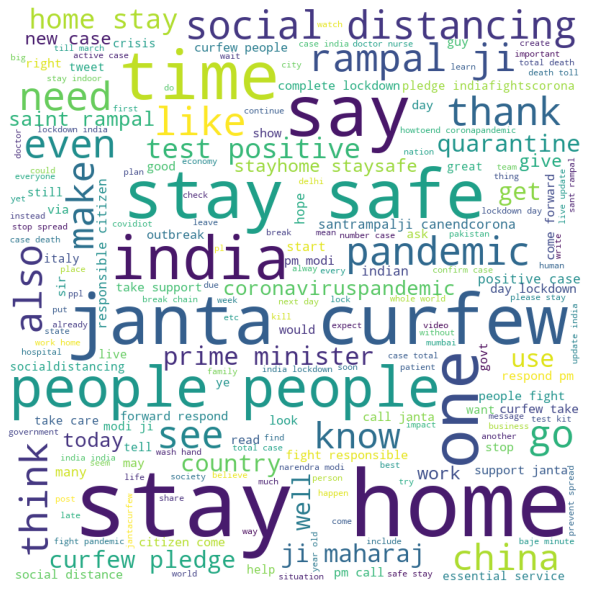

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['dear friend worry worthy effort corona virus extra careful strictly follow government doctor instruction save family also motivate',
 'way deal pandemic situation delhi airport last three hour huge queue wait health check arrival social distancing india',
 'good decision well do delhi govt lage raho kerala model relief must go national',
 'ndtv anchor sonal mehrotra self quarantine sister law kanika kapoor test positive covid',
 'china make temporary bed hospital day viral world news gujarat convert newly build building civil hospital bed operation theatre completely dedicate coronavirus day first case still msm yet cover gj']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across globe',
 'across india',
 'across state',
 'across world',
 'action take',
 'active case',
 'active case total',
 'address nation',
 'address nation pm',
 'air india',
 'also take',
 'also take pledge',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amid scare',
 'announce complete',
 'announce lockdown',
 'anti caa',
 'appeal people',
 'appeal prime',
 'appeal prime minister',
 'appreciate effort',
 'around world',
 'arvind kejriwal',
 'ask people',
 'aspect relate',
 'avoid infection',
 'avoid spread',
 'aware lockdownnow',
 'aware lockdownnow india',
 'back home',
 'baje minute',
 'become responsibility',
 'become responsibility time',
 'behave like',
 'best way',
 'big problem',
 'billion people',
 'ble pm',
 'break chain',
 'break news',
 'brother sister',
 'call janta',
 'call janta curfew',
 'canendcorona request',
 'care worker',
 'case confirm',
 'case country',
 'case day',
 'case death',
 'case increase',
 'case india',
 '

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:rampal ji,next day,lockdown day,ji maharaj,rampal ji maharaj,saint rampal,saint rampal ji,whole world,howtoend coronapandemic,india indiafightscorona\nTopic 1:janta curfew,gudi padwa,coronaviruslockdown coronavirusindia,coronavirusindia coronaviruslockdown,charles test,prince charles test,charles test positive,people people,responsible citizen,come forward\nTopic 2:complete lockdown,essential service,india lockdown,prevent spread,till march,shaheen bagh,many people,day day,together fight,delhi police\nTopic 3:day lockdown,active case,case total,total death,confirm case,wash hand,update india,total confirm,social medium,total recovered\nTopic 4:test positive,positive case,prince charles,people die,number case,lockdown lockdown,case report,case india,total number,travel history\nTopic 5:social distancing,social distance,stop spread,staysafe stayhome,fight pandemic,doctor nurse,maintain social,look like,nationwide lockdown,take action\nTopic 6:pm modi,year old,india india,lockdow

In [ ]:
lda.perplexity(tf)

384.21006060412043

In [ ]:
f=open('lda_mar_21-25.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_21-25.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_21-25.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_21-25.pk')
shutil.move("topics_mar_21-25.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_21-25.txt')